In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , f1_score ,recall_score , precision_score,accuracy_score ,confusion_matrix ,roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

In [3]:
dataset2 = pd.read_csv("Diabetes1.csv",delimiter=",")
#Split dataset
print(dataset2.head())
print("dimension of Hypertension data: {}".format(dataset2.shape))
X=dataset2.drop(["id",'class','glyhb','frame'],axis=1)
y= dataset2['class']


     id   chol  stab.glu   hdl  ratio  glyhb    location  age  gender  height  \
0  1000  203.0        82  56.0    3.6   0.00  Buckingham   46  female    62.0   
1  1001  165.0        97  24.0    6.9   4.44  Buckingham   29  female    64.0   
2  1002  228.0        92  37.0    6.2   4.64  Buckingham   58  female    61.0   
3  1003   78.0        93  12.0    6.5   4.63  Buckingham   67    male    67.0   
4  1005  249.0        90  28.0    8.9   7.72  Buckingham   64    male    68.0   

   weight   frame  bp.1s  bp.1d  bp.2s  bp.2d  waist   hip  time.ppn  class  
0   121.0  medium  118.0   59.0    NaN    NaN   29.0  38.0     720.0      0  
1   218.0   large  112.0   68.0    NaN    NaN   46.0  48.0     360.0      0  
2   256.0   large  190.0   92.0  185.0   92.0   49.0  57.0     180.0      0  
3   119.0   large  110.0   50.0    NaN    NaN   33.0  38.0     480.0      0  
4   183.0  medium  138.0   80.0    NaN    NaN   44.0  41.0     300.0      1  
dimension of Hypertension data: (403, 20)


In [4]:
dataset2.isnull().sum()

id            0
chol          1
stab.glu      0
hdl           1
ratio         1
glyhb        13
location      0
age           0
gender        0
height        5
weight        1
frame        12
bp.1s         5
bp.1d         5
bp.2s       262
bp.2d       262
waist         2
hip           2
time.ppn      3
class         0
dtype: int64

In [19]:
print(dataset2.groupby('class').size())

class
0    330
1     73
dtype: int64


In [5]:
columns1=['chol', 'hdl', 'ratio', 'glyhb','height', 'weight', 'bp.1s', 'bp.1d', 'bp.2s',
       'bp.2d', 'waist', 'hip', 'time.ppn', 'class']
for x in columns1:
    #assigning the mean to missing values in numeric columns
    dataset2[x]=dataset2[x].fillna(dataset2[x].mean())
    
    

In [6]:
columns=['chol','hdl','ratio','glyhb','height','weight','bp.1s','bp.1d','bp.2s','bp.2d','waist','hip','time.ppn']
for x in columns:
    #assigning the mean to missing values in numeric columns
    dataset2[x]=dataset2[x].fillna(dataset2[x].mean())
    
columnsl=['frame']    
for x in columnsl:
    #assigning the backward fill to missing values in columns 
    dataset2[x]=dataset2[x].fillna( method ='bfill')
    # convert normal and abnormal to 0 and 1
    dataset2[x] =dataset2[x].replace(to_replace=({'small':"0",'medium':"1",'large':"2"}))
columns2=['gender']    
for x in columns2:
    #assigning the backward fill to missing values in columns 
    dataset2[x]=dataset2[x].fillna( method ='bfill')
    # convert normal and abnormal to 0 and 1
    dataset2[x] =dataset2[x].replace(to_replace=({'female':"0",'male':"1"}))


In [7]:
dataset2.isnull().sum()

id          0
chol        0
stab.glu    0
hdl         0
ratio       0
glyhb       0
location    0
age         0
gender      0
height      0
weight      0
frame       0
bp.1s       0
bp.1d       0
bp.2s       0
bp.2d       0
waist       0
hip         0
time.ppn    0
class       0
dtype: int64

In [55]:
dataset=dataset2.to_csv(r'diabetes1.csv')
diabetes = pd.read_csv("diabetes1.csv",delimiter=",")
X=diabetes.drop(['Unnamed: 0','id','glyhb','location'],axis=1)
y= diabetes['class']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


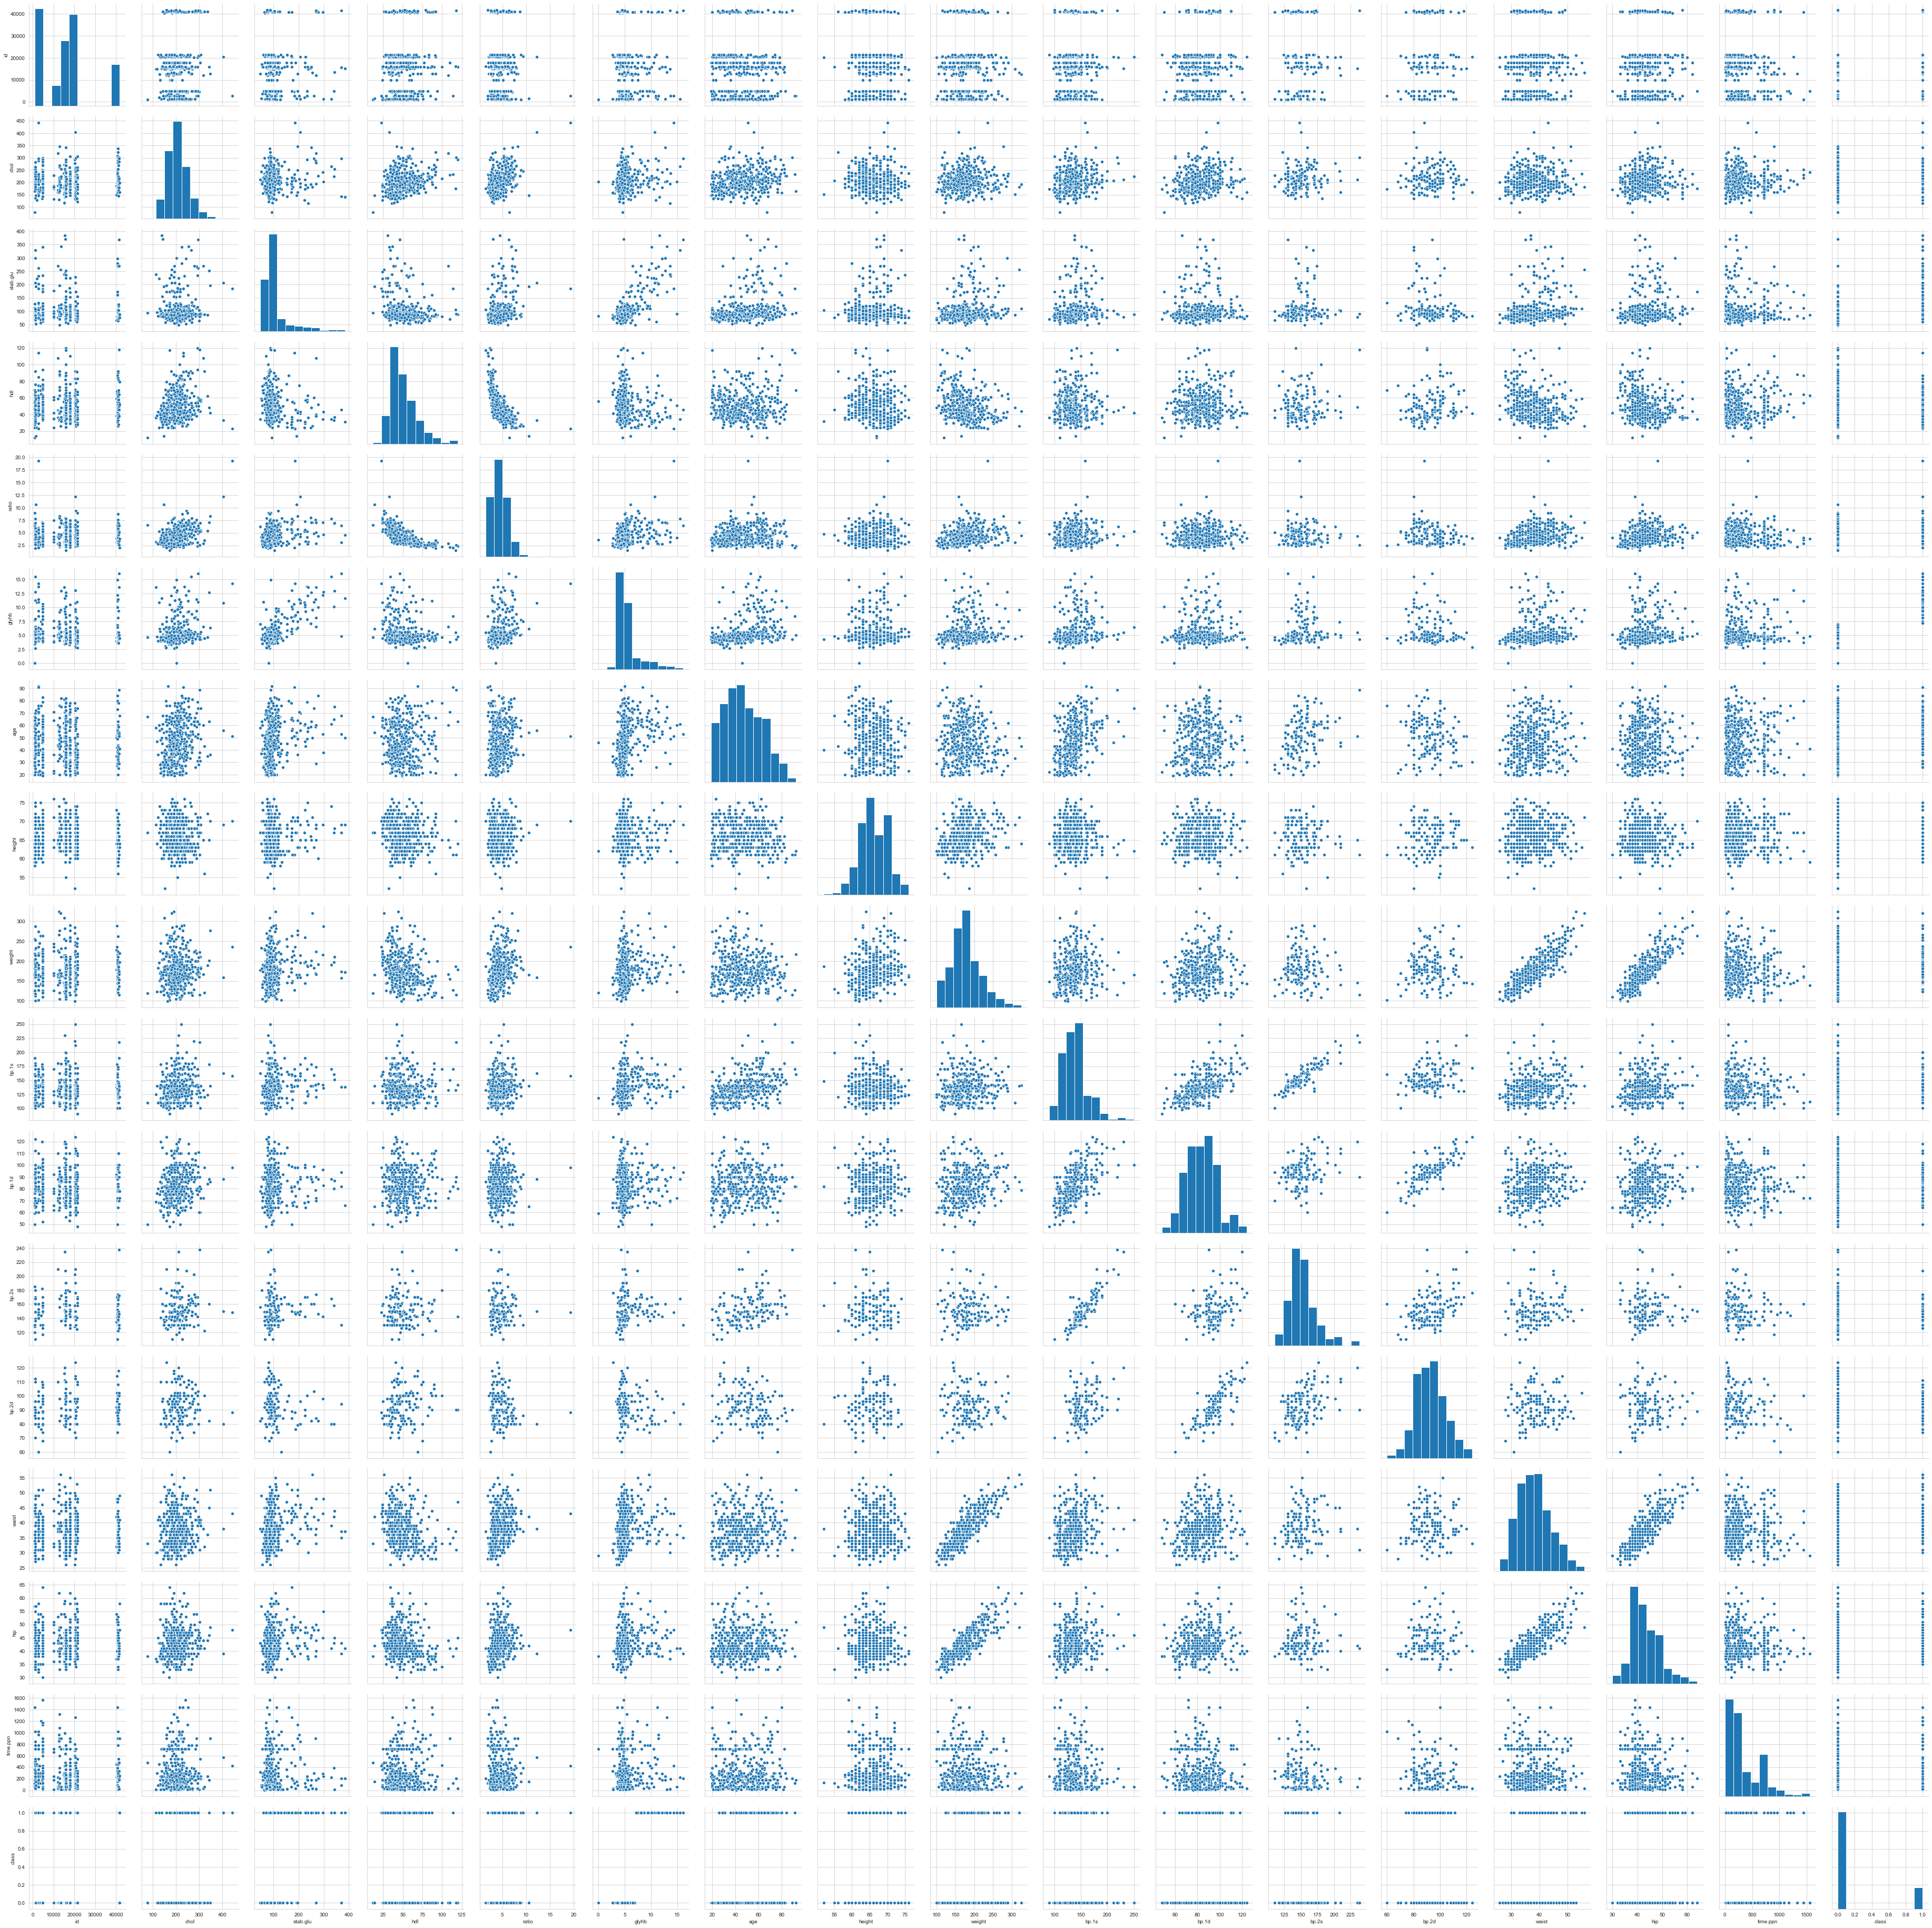

In [8]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(dataset2,size=3)

In [13]:
LR= LogisticRegression()
KNN= KNeighborsClassifier()
CART= DecisionTreeClassifier()
NB= GaussianNB()
SVM= SVC(random_state=42)
MLP=MLPClassifier(hidden_layer_sizes=(15,15,15), activation='logistic', solver='lbfgs',random_state=42)
DT=DecisionTreeClassifier()
RF=RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [22]:
import tensorflow as tf
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_dim=16),
    tf.keras.layers.Dense(3)
])

cnn.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',metrics=['accuracy'])

cnn.summary()

cnn.fit(X, y, epochs=200, batch_size=5)

_, accuracy = cnn.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 323
Trainable params: 323
Non-trainable params: 0
_________________________________________________________________
Train on 403 samples
Epoch 1/200


ValueError: could not convert string to float: 'Buckingham'

In [55]:
# evaluate the model
_, train_acc = cnn.evaluate(X_train2,y_train2 , verbose=0)
print('train',train_acc)
_, test_acc = cnn.evaluate(X_test2, y_test2, verbose=0)
print('test',test_acc)

train 0.7276423
test 0.8333333


In [56]:
y_pred = cnn.predict(X_test2, batch_size=5)
y_pred_bool = np.argmax(y_pred, axis=1)
fpr, tpr, thresholds = metrics.roc_curve(y_test2, y_pred_bool, pos_label=1)
auc=metrics.auc(fpr, tpr)
print("Auc",auc)
print(classification_report(y_test2, y_pred_bool))

Auc 0.775
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.86      0.60      0.71        10

    accuracy                           0.83        30
   macro avg       0.84      0.77      0.79        30
weighted avg       0.84      0.83      0.82        30



# feature selection 

In [25]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=6).fit_transform(X, y)
X_new
#chol,stab.glu,age,weight,time.ppn
X_chi=diabetes.drop(['Unnamed: 0', 'id','hdl', 'ratio', 'glyhb','location','gender', 'height','frame', 'bp.1s','bp.1d', 'bp.2s', 'bp.2d', 'waist', 'hip'],axis=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_chi,y,test_size=30,random_state=100)

In [37]:
sfs=SFS(RF,k_features =4,forward=True,floating=False,scoring='accuracy',verbose=2,cv =4,n_jobs= -1)
sfs.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   42.8s finished

[2020-02-26 15:03:25] Features: 1/4 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    7.9s finished

[2020-02-26 15:03:33] Features: 2/4 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    7.8s finished

[2020-02-26 15:03:41] Features: 3/4 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    7.9s finished

[2020-02-26 15:03:49] Features: 4/4 -- score: 1.0

SequentialFeatureSelector(clone_estimator=True, cv=4,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           n_es

In [38]:
print(sfs.k_feature_idx_)
print(sfs.k_feature_names_)
print('CV Score: ',sfs.k_score_)

(0, 1, 2, 16)
('chol', 'stab.glu', 'hdl', 'class')
CV Score:  1.0


In [44]:
X_sfs=diabetes.drop(['ratio', 'age', 'gender', 'height', 'weight',
       'frame', 'bp.1s', 'bp.1d', 'bp.2s', 'bp.2d', 'waist', 'hip', 'time.ppn'],axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sfs,y,test_size=30,random_state=7)

In [45]:
rfe = RFE(RF,n_features_to_select = 5).fit(X, y)
print(rfe.get_support())
print(X.columns)

[ True  True False  True  True False False False False False False False
 False False False False  True]
Index(['chol', 'stab.glu', 'hdl', 'ratio', 'age', 'gender', 'height', 'weight',
       'frame', 'bp.1s', 'bp.1d', 'bp.2s', 'bp.2d', 'waist', 'hip', 'time.ppn',
       'class'],
      dtype='object')


In [43]:
X_rfe=diabetes.drop(['hdl','gender', 'height', 'weight',
       'frame', 'bp.1s', 'bp.1d', 'bp.2s', 'bp.2d', 'waist', 'hip', 'time.ppn'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_rfe,y,test_size=30,random_state=7)

In [40]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=30,random_state=7)

In [41]:
def model(model,X_tr, X_te, y_tr, y_te):
    model.fit(X_tr,y_tr)
    predict=model.predict(X_te)
    mae = np.mean(abs(predict - y_te))
    print('MAE = %0.4f' % mae)
    fpr, tpr, thresholds = metrics.roc_curve(y_te, predict, pos_label=1)
    auc=metrics.auc(fpr, tpr)
    print("Auc",auc)
    confusion_matrix(y_te, predict)
    print('accuracy score',accuracy_score(y_te,predict)*100)
    print('Classification report \n')
    print(classification_report(y_te,predict))
    print("Train acc: ",accuracy_score(y_tr,model.predict(X_tr)))
    print("test acc: ",accuracy_score(y_te,predict))
    

In [42]:
from sklearn.model_selection import cross_val_score
def crossV(model,X,y):
    print("Cross Validation: ")
    accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10).mean() * 100
    print("Accuracy : " , accuracy)
    f1 = cross_val_score( model, X, y, cv=10, scoring='f1_macro').mean() * 100
    print("f1 : " , f1)

    recall = cross_val_score( model, X, y, cv=10, scoring='recall_macro').mean() * 100
    print("recall : " , recall)

    precision = cross_val_score( model, X, y, cv=10, scoring='precision_macro').mean() * 100
    print("precision : " , precision)


# LR

In [46]:
#before feature selection
model(LR,X_train2, X_test2, y_train2, y_test2)
crossV(LR,X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

MAE = 0.0333
Auc 0.9
accuracy score 96.66666666666667
Classification report 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.80      0.89         5

    accuracy                           0.97        30
   macro avg       0.98      0.90      0.93        30
weighted avg       0.97      0.97      0.97        30

Train acc:  1.0
test acc:  0.9666666666666667
Cross Validation: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy :  99.25


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

f1 :  98.72024492920015
recall :  98.98268398268397


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

precision :  98.60294117647058


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
# sfs 
model(LR,X_train, X_test, y_train, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'Buckingham'

In [48]:
#rfe
model(LR,X_train1, X_test1, y_train1, y_test1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'Buckingham'

In [49]:
#chi
model(LR,X_train3, X_test3, y_train3, y_test3)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# SVM

In [50]:
#before feature selection
model(SVM,X_train2, X_test2, y_train2, y_test2)
crossV(SVM,X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to

MAE = 0.1667
Auc 0.5
accuracy score 83.33333333333334
Classification report 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       0.00      0.00      0.00         5

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30

Train acc:  1.0
test acc:  0.8333333333333334
Cross Validation: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Accuracy :  81.89634146341463


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly 

f1 :  45.022213994816724


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

recall :  50.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 

precision :  40.948170731707314


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
# sfs 
model(SVM,X_train, X_test, y_train, y_test)

ValueError: could not convert string to float: 'Buckingham'

In [52]:
#rfe
model(SVM,X_train1, X_test1, y_train1, y_test1)

ValueError: could not convert string to float: 'Buckingham'

In [30]:
#chi
model(SVM,X_train3, X_test3, y_train3, y_test3)

MAE = 0.2667
Auc 0.5
accuracy score 73.33333333333333
Classification report 

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        22
           1       0.00      0.00      0.00         8

    accuracy                           0.73        30
   macro avg       0.37      0.50      0.42        30
weighted avg       0.54      0.73      0.62        30

Train acc:  1.0
test acc:  0.7333333333333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# MLP

In [35]:
#before feature selection
model(MLP,X_train2, X_test2, y_train2, y_test2)
crossV(MLP,X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MAE = 0.4000
Auc 0.6
accuracy score 60.0
Classification report 

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        20
           1       0.43      0.60      0.50        10

    accuracy                           0.60        30
   macro avg       0.59      0.60      0.58        30
weighted avg       0.64      0.60      0.61        30

Train acc:  0.5650406504065041
test acc:  0.6
Cross Validation: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

Accuracy :  56.00820232399178


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

f1 :  55.846648518948264


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

recall :  60.25099715099715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

precision :  59.87524484875655


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [36]:
# sfs 
model(MLP,X_train, X_test, y_train, y_test)

MAE = 0.6667
Auc 0.5
accuracy score 33.33333333333333
Classification report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.33      1.00      0.50        10

    accuracy                           0.33        30
   macro avg       0.17      0.50      0.25        30
weighted avg       0.11      0.33      0.17        30

Train acc:  0.34417344173441733
test acc:  0.3333333333333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
#rfe
model(MLP,X_train1, X_test1, y_train1, y_test1)

MAE = 0.6667
Auc 0.425
accuracy score 33.33333333333333
Classification report 

              precision    recall  f1-score   support

           0       0.50      0.15      0.23        20
           1       0.29      0.70      0.41        10

    accuracy                           0.33        30
   macro avg       0.40      0.42      0.32        30
weighted avg       0.43      0.33      0.29        30

Train acc:  0.3970189701897019
test acc:  0.3333333333333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [31]:
#chi
model(MLP,X_train3, X_test3, y_train3, y_test3)

MAE = 0.1667
Auc 0.6875
accuracy score 83.33333333333334
Classification report 

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        22
           1       1.00      0.38      0.55         8

    accuracy                           0.83        30
   macro avg       0.91      0.69      0.72        30
weighted avg       0.86      0.83      0.80        30

Train acc:  0.8820375335120644
test acc:  0.8333333333333334


# naive bayes

In [38]:
#before feature selection
model(NB,X_train2, X_test2, y_train2, y_test2)
crossV(NB,X,y)

MAE = 0.2667
Auc 0.725
accuracy score 73.33333333333333
Classification report 

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.58      0.70      0.64        10

    accuracy                           0.73        30
   macro avg       0.71      0.72      0.71        30
weighted avg       0.75      0.73      0.74        30

Train acc:  0.7506775067750677
test acc:  0.7333333333333333
Cross Validation: 
Accuracy :  74.74025974025975
f1 :  71.51731557572181
recall :  71.24330484330484
precision :  72.25515084583834


In [39]:
# rfe 
model(NB,X_train, X_test, y_train, y_test)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [40]:
#sfs
model(NB,X_train1, X_test1, y_train1, y_test1)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [32]:
#chi
model(NB,X_train3, X_test3, y_train3, y_test3)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


# Knn

In [41]:
#before feature selection
model(KNN,X_train2, X_test2, y_train2, y_test2)
crossV(KNN,X,y)

MAE = 0.2333
Auc 0.7000000000000001
accuracy score 76.66666666666667
Classification report 

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       0.71      0.50      0.59        10

    accuracy                           0.77        30
   macro avg       0.75      0.70      0.71        30
weighted avg       0.76      0.77      0.75        30

Train acc:  0.8021680216802168
test acc:  0.7666666666666667
Cross Validation: 
Accuracy :  71.61141490088858
f1 :  67.82029863421724
recall :  67.47321937321938
precision :  68.79347605503844


In [42]:
# sfs 
model(KNN,X_train, X_test, y_train, y_test)

MAE = 0.2667
Auc 0.725
accuracy score 73.33333333333333
Classification report 

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.58      0.70      0.64        10

    accuracy                           0.73        30
   macro avg       0.71      0.72      0.71        30
weighted avg       0.75      0.73      0.74        30

Train acc:  0.7926829268292683
test acc:  0.7333333333333333


In [43]:
#rfe
model(KNN,X_train1, X_test1, y_train1, y_test1)

MAE = 0.3333
Auc 0.6499999999999999
accuracy score 66.66666666666666
Classification report 

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.50      0.60      0.55        10

    accuracy                           0.67        30
   macro avg       0.64      0.65      0.64        30
weighted avg       0.69      0.67      0.67        30

Train acc:  0.7886178861788617
test acc:  0.6666666666666666


In [33]:
#chi
model(KNN,X_train3, X_test3, y_train3, y_test3)

MAE = 0.1667
Auc 0.6875
accuracy score 83.33333333333334
Classification report 

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        22
           1       1.00      0.38      0.55         8

    accuracy                           0.83        30
   macro avg       0.91      0.69      0.72        30
weighted avg       0.86      0.83      0.80        30

Train acc:  0.903485254691689
test acc:  0.8333333333333334


# DecisionTree

In [44]:
#before feature selection
model(DT,X_train2, X_test2, y_train2, y_test2)
crossV(DT,X,y)

MAE = 0.3333
Auc 0.6
accuracy score 66.66666666666666
Classification report 

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.50      0.40      0.44        10

    accuracy                           0.67        30
   macro avg       0.61      0.60      0.60        30
weighted avg       0.65      0.67      0.66        30

Train acc:  1.0
test acc:  0.6666666666666666
Cross Validation: 
Accuracy :  69.67019822282981
f1 :  65.23344522107712
recall :  66.39857549857548
precision :  66.43240342819068


In [45]:
# sfs 
model(DT,X_train, X_test, y_train, y_test)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [46]:
#rfe
model(DT,X_train1, X_test1, y_train1, y_test1)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [34]:
#chi
model(DT,X_train3, X_test3, y_train3, y_test3)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


# Random Forest

In [47]:
#before feature selection
model(RF,X_train2, X_test2, y_train2, y_test2)
crossV(RF,X,y)

MAE = 0.2333
Auc 0.7250000000000001
accuracy score 76.66666666666667
Classification report 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.67      0.60      0.63        10

    accuracy                           0.77        30
   macro avg       0.74      0.72      0.73        30
weighted avg       0.76      0.77      0.76        30

Train acc:  1.0
test acc:  0.7666666666666667
Cross Validation: 
Accuracy :  76.16370471633631
f1 :  72.85166860419866
recall :  72.32905982905983
precision :  74.32774395814464


In [48]:
# sfs 
model(RF,X_train, X_test, y_train, y_test)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [49]:
#rfe
model(RF,X_train1, X_test1, y_train1, y_test1)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [35]:
#chi
model(RF,X_train3, X_test3, y_train3, y_test3)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


# CART

In [50]:
#before feature selection
model(CART,X_train2, X_test2, y_train2, y_test2)
crossV(CART,X,y)

MAE = 0.3000
Auc 0.625
accuracy score 70.0
Classification report 

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.57      0.40      0.47        10

    accuracy                           0.70        30
   macro avg       0.66      0.62      0.63        30
weighted avg       0.68      0.70      0.68        30

Train acc:  1.0
test acc:  0.7
Cross Validation: 
Accuracy :  69.79665071770334
f1 :  67.07871180986538
recall :  67.15413105413106
precision :  67.25049843769952


In [51]:
# sfs 
model(CART,X_train, X_test, y_train, y_test)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [52]:
#rfe
model(CART,X_train1, X_test1, y_train1, y_test1)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [36]:
#chi
model(CART,X_train3, X_test3, y_train3, y_test3)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0
